In [1]:
import pandas as pd

In [2]:
fpath = './data/subway_data/subway_raw.xlsx'
raw = pd.read_excel(fpath)

In [3]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


<h1> Q1) 승객이 가장 많이 타는 역은?

In [15]:
data_station = raw.pivot_table(index = '역명', values = '승차총승객수', aggfunc = 'sum')
data_station = data_station.sort_values(by = '승차총승객수', ascending = False)

data_station.head(10)

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
사당,12304165
신림,11881525
선릉,10725980
구로디지털단지,10577842


<h1> Q2) 노선별로 역별/요일별 승객수 비교하기

In [16]:
raw['노선명'].unique()

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [23]:
# 우선 1호선만

line = '1호선'
data_line = raw[raw['노선명'] == line]

df_pivot = data_line.pivot_table(index = ['역ID', '역명'], columns = '요일', values = '승차총승객수', aggfunc = 'sum')
df_pivot = df_pivot[['월', '화', '수', '목', '금', '토', '일']]  # 요일 순서 재정렬
df_pivot = df_pivot / 10000  # 보기 쉽게 1만 단위로 나누기
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


In [24]:
# seaborn, matplotlib 의 이미지에서 한글 표현하기
# 외우지말고 그냥 복붙해서 써도 됨

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지에 한글 표시 설정
if platform.system() == 'Windows': # 윈도우인 경우 맑은고딕
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else :  # Mac인 경우 애플고딕
    rc('font', family='AppleGothic')

# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'1호선 역별, 요일별 승객수'}, xlabel='요일', ylabel='역ID-역명'>

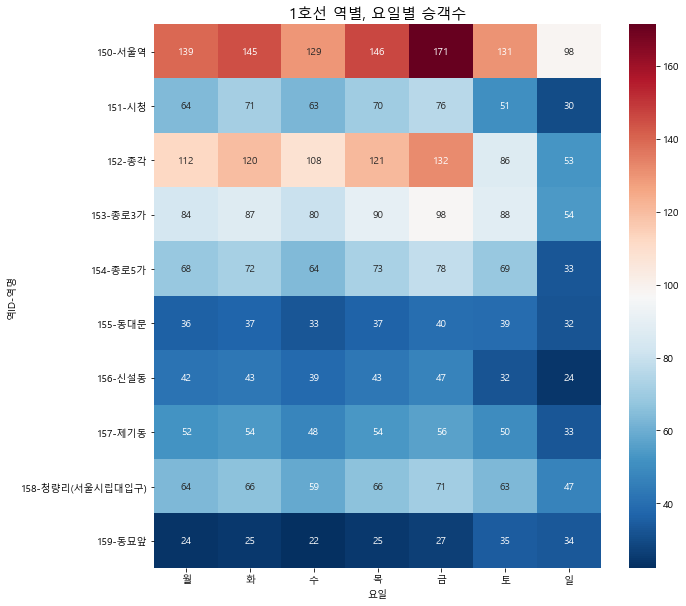

In [38]:
fig, ax = plt.subplots(figsize = (10, 10)) 

plt.title(f'{line} 역별, 요일별 승객수', fontsize = 15)

sns.heatmap(df_pivot, cmap = 'RdBu_r',
            annot = True, fmt = '.0f')

In [41]:
raw['노선명'].unique()

# 이 중 ~호선 인 노선만 가져와서 해보기

array(['경춘선', '경인선', '경의선', '경원선', '경부선', '2호선', '경강선', '수인선', '분당선',
       '9호선2~3단계', '9호선', '8호선', '7호선', '6호선', '공항철도 1호선', '5호선', '4호선',
       '3호선', '1호선', '중앙선', '안산선', '우이신설선', '일산선', '장항선', '과천선'],
      dtype=object)

In [43]:

line_seoul_list = []

for line in raw['노선명'].unique():
    # 2~3번째 글자가 '호선'인 것 찾기
    if line[1:] == '호선':
        print(line)
        line_seoul_list.append(line)  # 위의 리스트에 추가해주기
        

2호선
9호선
8호선
7호선
6호선
5호선
4호선
3호선
1호선


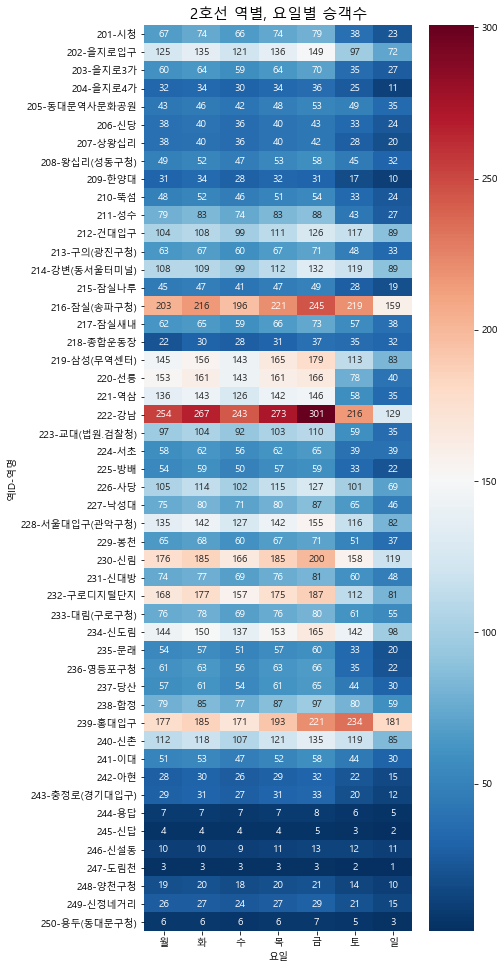

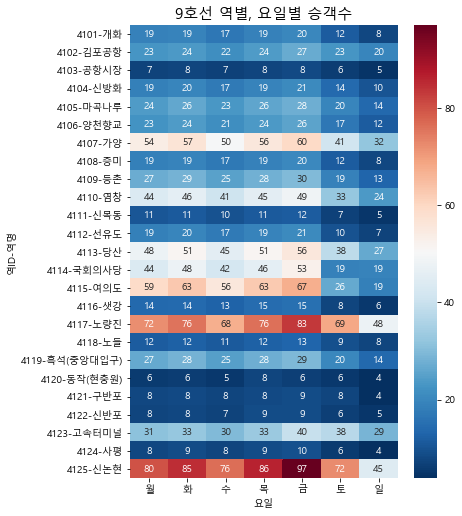

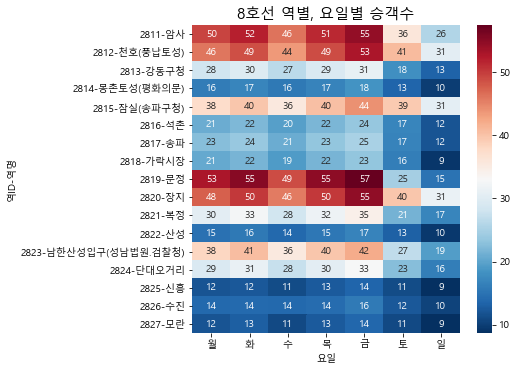

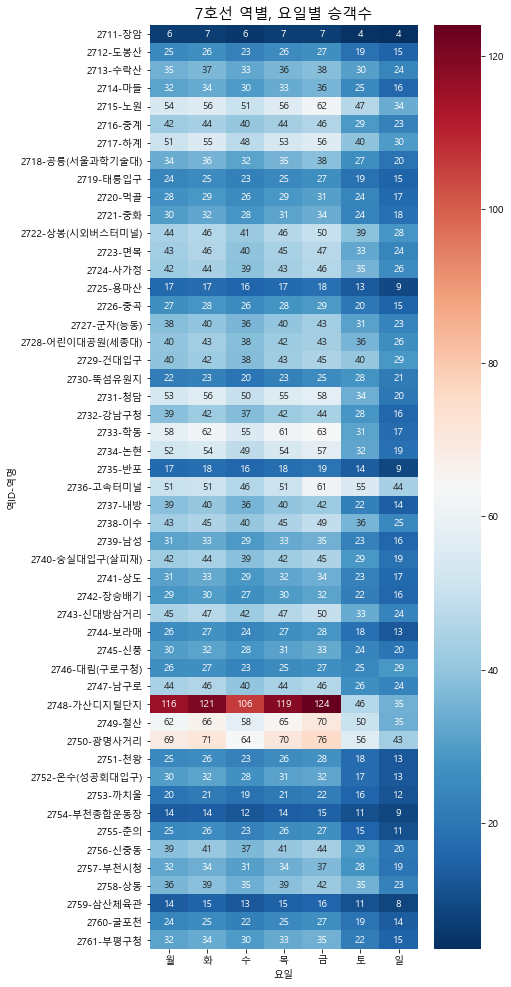

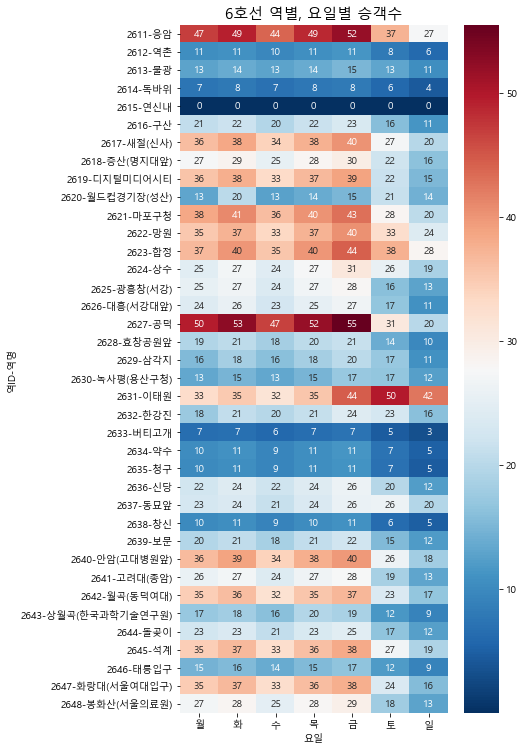

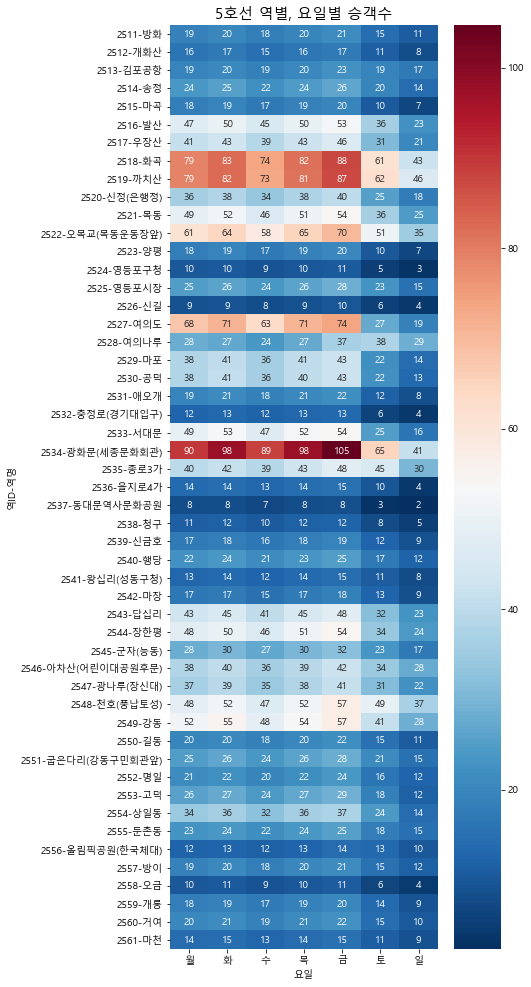

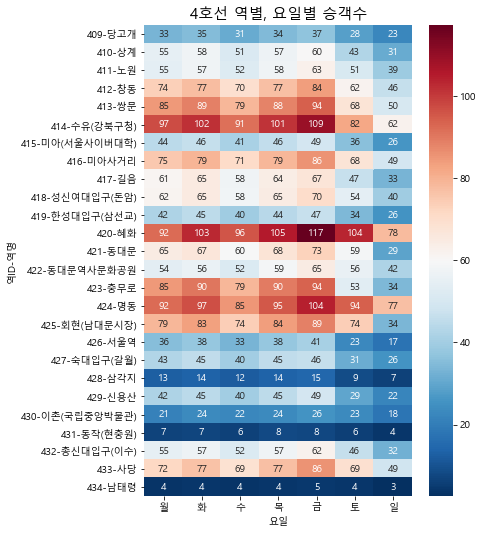

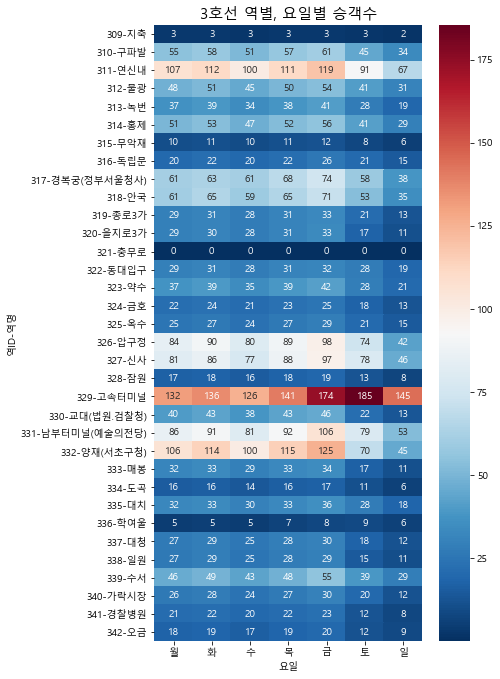

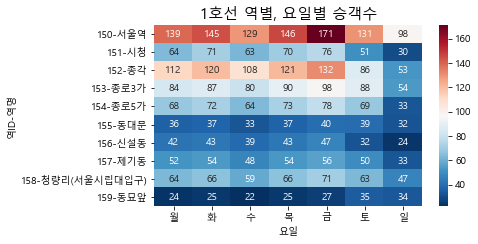

In [47]:
# line을 하나씩 꺼내기

for line in line_seoul_list:
    data_line = raw[raw['노선명'] == line]

    df_pivot = data_line.pivot_table(index = ['역ID', '역명'], columns = '요일', values = '승차총승객수', aggfunc = 'sum')
    df_pivot = df_pivot[['월', '화', '수', '목', '금', '토', '일']]  # 요일 순서 재정렬
    df_pivot = df_pivot / 10000  # 보기 쉽게 1만 단위로 나누기
    
    fig, ax = plt.subplots(figsize = (6, len(df_pivot)/3)) # 세로크기: 행 갯수/3
    plt.title(f'{line} 역별, 요일별 승객수', fontsize = 15)
    sns.heatmap(df_pivot, cmap = 'RdBu_r',
                annot = True, fmt = '.0f')